<a href="https://colab.research.google.com/github/namrmino/Timeseries_SelfStudy/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

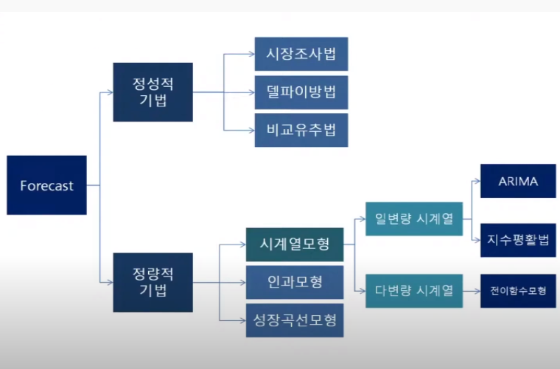

정성적 기법 : 충분한 데이터(예측자료) 없을 때 사용

정량적 기법 : 충분한 데이터가 확보된 상태에서 사용

# 시계열분석 (Time Series)

* 시간 ! : 특정 간격 갖는 시간 (Lag)
  - Lag 에서 Data의 Trend를 찾는다!

* 일변량 정상시계열
  - ARIMA

* Trend : 추세
* Seasonality : 계절성
* Cycle : 주기
* Noise : 잡음

통계적인 관점에서 시간에 따라서 독립적으로 평균과 분산이 변하지 않는 것들.

그런 데이터들을 시계열 내에서 분석이 가능한 잡음이다라고 하는데 이들을 백색잡음(White Noise)라고 부른다.

시간에 따라서 데이터가 찍히긴 하는데 그 데이터가 변동을 갖게 되는 것이다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 


plt.rc("font",family="Malgun Gothic")

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/시계열분석/시계열_데이터스테이션/Data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [4]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [5]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


datetime으로 바꿔줘서 시간순서대로 정렬하기

In [6]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [7]:
df1['Datetime'].describe()

count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [8]:
df1

,구매일,구매금액,물품대분류,Datetime
0,2018-04-20,57120,기저귀,2018-04-20
1,2018-04-20,15900,더블하트,2018-04-20
2,2018-04-20,7000,더블하트,2018-04-20
3,2018-04-20,20900,더블하트,2018-04-20
4,2018-05-06,26500,더블하트,2018-05-06
...,...,...,...,...
803670,2020-08-06,30960,더블하트,2020-08-06
803671,2020-08-06,6640,더블하트,2020-08-06
803672,2020-08-06,5600,더블하트,2020-08-06
803673,2020-08-06,7840,더블하트,2020-08-06


In [9]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

In [10]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


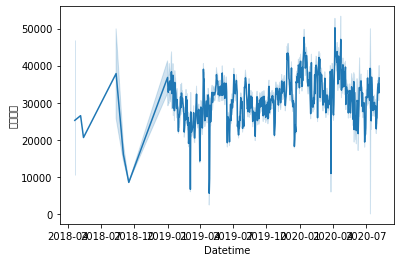

In [22]:
sns.lineplot(data=df1, x='Datetime', y='구매금액')

In [11]:
p1 = pd.pivot_table(data=df1,
                    index='Datetime',
                    values='구매금액',
                    aggfunc='sum').reset_index()

In [12]:
p1

,Datetime,구매금액
0,2018-04-20,100920
1,2018-05-06,26500
2,2018-05-14,20600
3,2018-08-12,75700
4,2018-09-01,48300
...,...,...
584,2020-08-03,27560340
585,2020-08-04,31832500
586,2020-08-05,27683180
587,2020-08-06,22574070


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


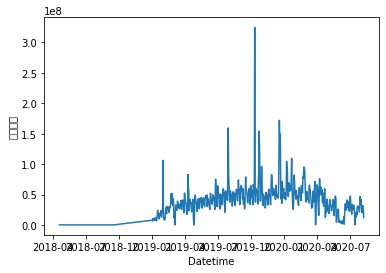

In [13]:
sns.lineplot(data=p1, x='Datetime', y='구매금액')

In [14]:
p2 = pd.pivot_table(data=df1,
                    index=['Datetime','물품대분류'],
                    values='구매금액', aggfunc='sum').reset_index()

In [15]:
p2

,Datetime,물품대분류,구매금액
0,2018-04-20,기저귀,57120
1,2018-04-20,더블하트,43800
2,2018-05-06,더블하트,26500
3,2018-05-14,FC,20600
4,2018-08-12,더블하트,75700
...,...,...,...
5241,2020-08-07,기타,182400
5242,2020-08-07,더블하트,408480
5243,2020-08-07,물티슈,100300
5244,2020-08-07,체험팩,112050


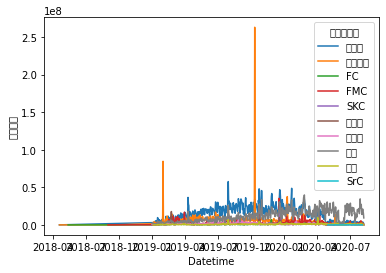

In [16]:
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

In [17]:
cond1 = (df1['물품대분류']=='기저귀')
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


**ARIMA (Auto Regressive Integrated  Moving Average Model)**

* AR (Auto Regressive Model) : 자기회귀모델 
    - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델 
    - ACF  : 자기상관함수 / 특정 구간내 데이터간 상관관계 
    - PACF : 부분자기상관함수
    
    
    
* MA (Moving Average Model) : 이동평균모델 
    - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델 

* Difference 차분 


**ARIMA Model**

- 단기예측에 적합 
- 계절적 변동요인 (주기적 변동)
- Sample > 50 
- 정성적자료 
    -> 차분 

In [18]:
import statsmodels.tsa.api as tsa

In [19]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [21]:
df_time2 = pd.pivot_table(data=df2, index='Datetime',
                          values='구매금액', aggfunc='sum').reset_index()

df_time2.set_index('Datetime')

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680
...,...
2020-08-03,3075900
2020-08-04,4010200
2020-08-05,2937800


In [23]:
df_time = pd.pivot_table(data=df2, index='Datetime',
                         values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [24]:
y = df_time['구매금액'].resample('1D').mean()

In [26]:
y.isnull().sum()

7

In [27]:
y1 = y.fillna(method='ffill')

In [28]:
y1

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

* 시계열 분해
  * Trend(추세요인)
  * Seasonality(계절요인)
  * Resdiual(불규칙 또는 순환 요인)

In [29]:
from pylab import rcParams

rcParams['figure.figsize']=15,10

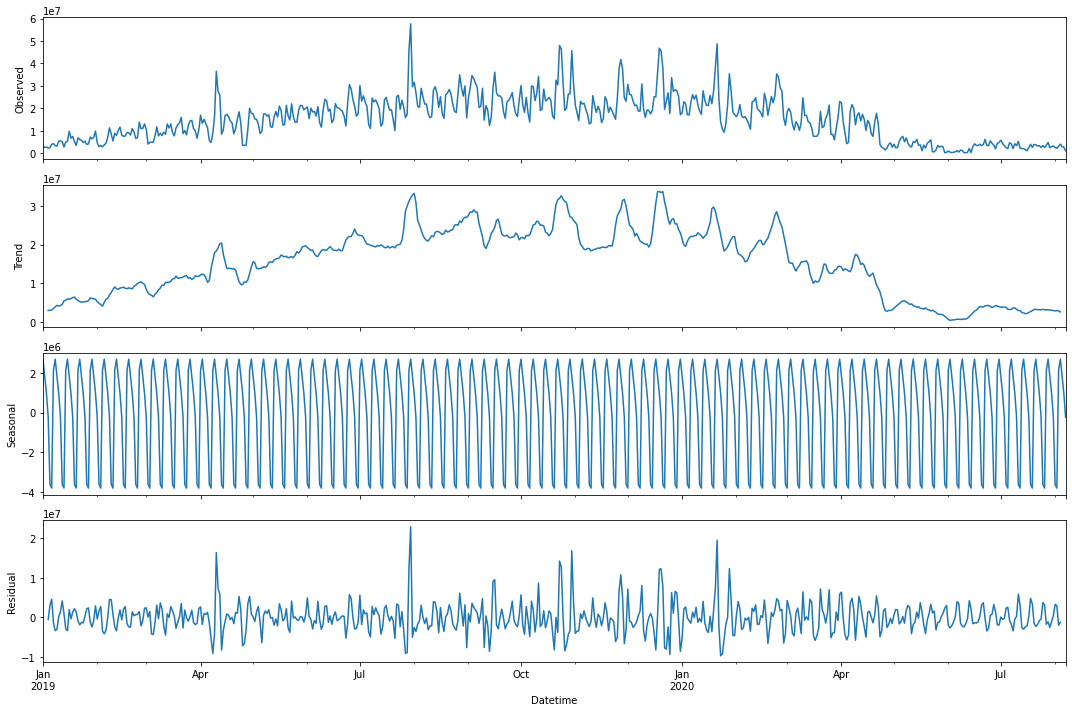

In [30]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

In [31]:
import itertools

In [32]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [33]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [34]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [38]:
for parma in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = tsa.statespace.SARIMAX(y1, order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationary=False,
                                   enforce_invertibility=False)
      results = mod.fit()
      param_list.append(param)
      param_seasonal_list.append(param_seasonal)
      results_AIC_list.append(results.aic)
    except:
      continue

In [39]:
ARIMA_list = pd.DataFrame({'Parameter':param_list, 'Seasonal':param_seasonal_list, 'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [40]:
ARIMA_list.sort_values(by='AIC').head(2)

,Parameter,Seasonal,AIC


In [41]:
mod = tsa.statespace.SARIMAX(y1,order=(1, 0, 1),seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5895      0.037     15.767      0.000       0.516       0.663
ma.L1          0.2723      0.045      6.096      0.000       0.185       0.360
ar.S.L12       0.9777      0.011     86.924      0.000       0.956       1.000
ma.S.L12      -0.7739      0.038    -20.540      0.000      -0.848      -0.700
sigma2      2.882e+13   3.25e-16   8.86e+28      0.000    2.88e+13    2.88e+13


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


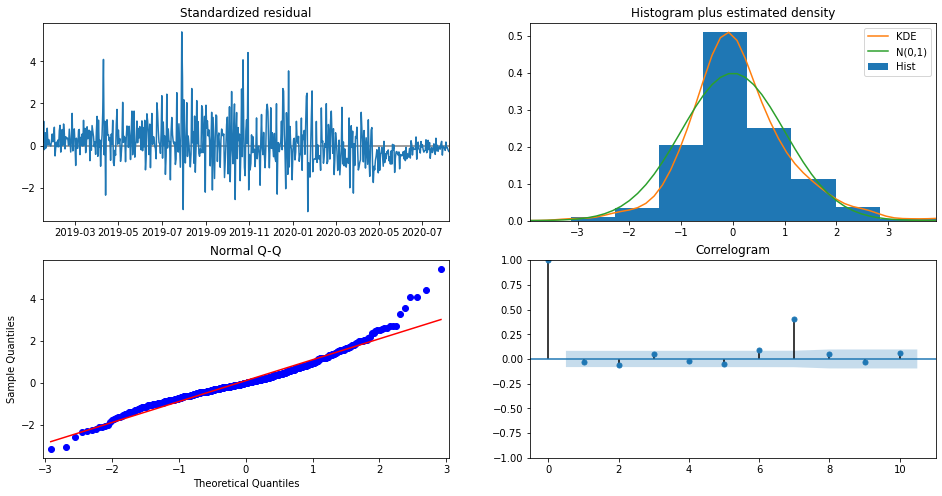

In [42]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [43]:
results.get_prediction()

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

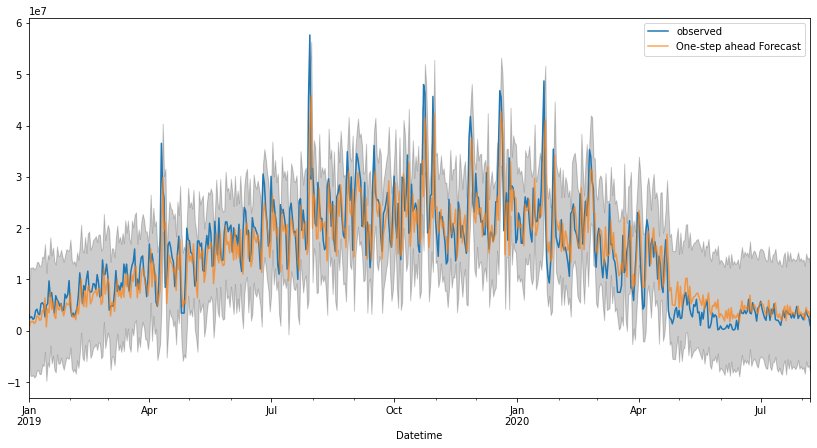

In [48]:
ax = y1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.2)

plt.legend()
plt.show()

In [50]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth)**2).mean()
print('MSE : {}'.format(round(mse, 2)))

MSE : 28388118514856.05


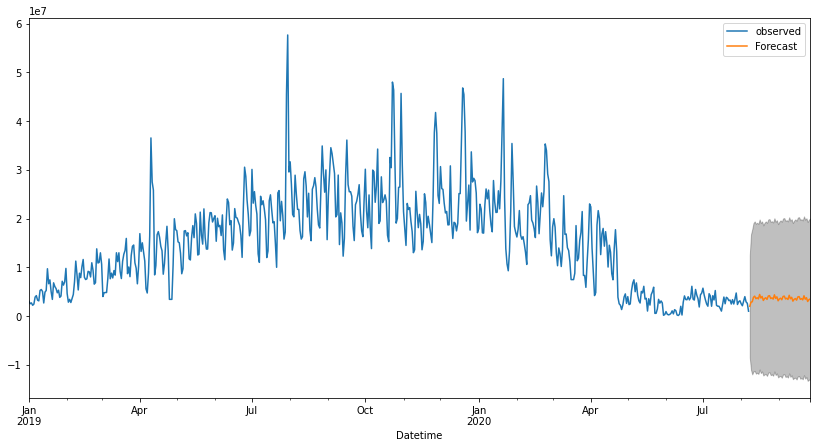

In [51]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() # 추정된 계수의 신뢰구간 계산
ax = y1.plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.25)

plt.legend()
plt.show()